In [1]:
# Include this line to make plots interactive
%matplotlib notebook

In [2]:

import requests 
import json
import pandas as pd
import numpy as np
from scipy import stats
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline
import gmaps
from pandas.io.json import json_normalize

#set ggplot style
plt.style.use('ggplot')


In [3]:
client = Socrata("chronicdata.cdc.gov", None)
url = "https://chronicdata.cdc.gov/resource/rb39-ixr6.json"
results = client.get("rb39-ixr6", limit=38708)

In [4]:
#results

In [5]:
#print(requests.get(url))

In [6]:
#print(requests.get(url).json())

In [7]:
#response = requests.get(url).json()
#print(json.dumps(response, indent = 4, sort_keys=True))
#marked out due to API stuff discussed with Brent

In [8]:
health_df = pd.DataFrame(results)
health_df.count()

:@computed_region_bxsw_vy29    37220
:@computed_region_he4y_prf8    37750
age                            38708
data_value                     24275
data_value_footnote            14433
data_value_footnote_symbol     14433
data_value_std_err             24275
data_value_type                38708
data_value_unit                38708
datasource                     38708
displayorder                   38708
education                      38708
gender                         38708
geolocation                    38708
high_confidence_limit          24275
locationabbr                   38708
locationdesc                   38708
low_confidence_limit           24275
measuredesc                    38708
measureid                      38708
race                           38708
response                       38708
sample_size                    24275
stratificationid1              38708
stratificationid2              38708
stratificationid3              38708
stratificationid4              38708
s

In [9]:
#Collecting a list of all columns within the DataFrame/
health_df.columns

Index([':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8', 'age',
       'data_value', 'data_value_footnote', 'data_value_footnote_symbol',
       'data_value_std_err', 'data_value_type', 'data_value_unit',
       'datasource', 'displayorder', 'education', 'gender', 'geolocation',
       'high_confidence_limit', 'locationabbr', 'locationdesc',
       'low_confidence_limit', 'measuredesc', 'measureid', 'race', 'response',
       'sample_size', 'stratificationid1', 'stratificationid2',
       'stratificationid3', 'stratificationid4', 'submeasure', 'submeasureid',
       'topicdesc', 'topicid', 'topictype', 'topictypeid', 'year'],
      dtype='object')

In [10]:
# Reorganizing the columns using double brackets
organized_df = health_df[["locationabbr","year","locationdesc","topicdesc","measuredesc","submeasure","data_value","sample_size","gender","age","race","education", "geolocation"]]
organized_df.head

<bound method NDFrame.head of       locationabbr  year    locationdesc                      topicdesc  \
0               KS  2011          Kansas          Cigarette Use (Youth)   
1               WY  1999         Wyoming          Cigarette Use (Youth)   
2               DE  2009        Delaware          Cigarette Use (Youth)   
3               WY  1995         Wyoming          Cigarette Use (Youth)   
4               WY  2013         Wyoming  Smokeless Tobacco Use (Youth)   
5               MS  2001     Mississippi          Cigarette Use (Youth)   
6               VT  2005         Vermont  Smokeless Tobacco Use (Youth)   
7               MT  2005         Montana          Cigarette Use (Youth)   
8               OH  2013            Ohio          Cigarette Use (Youth)   
9               ID  2013           Idaho              Cigar Use (Youth)   
10              NM  2005      New Mexico  Smokeless Tobacco Use (Youth)   
11              ME  2015           Maine        Any Tobacco Use (Youth

In [11]:
renamed_df = organized_df.rename(columns={"locationabbr":"Location Code","year":"Year","locationdesc":"State","topicdesc":"Use Type","measuredesc":"Status","submeasure":"Frequency","data_value":"% of Respondents","sample_size":"Sample Size","gender":"Gender","age":"Age","race":"Race","education":"Education"})
renamed_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."


In [12]:
Minus_Nat= renamed_df.loc[renamed_df["State"] !="National (States and DC)"]
Minus_PR = Minus_Nat.loc[Minus_Nat["State"] !="Puerto Rico"]
Minus_NatPRGuam = Minus_PR.loc[Minus_PR["State"] !="Guam"]
Minus_NatPRGuam.head()
#Minus_Ohio['C'] = np.arange(len(Minus_Ohio))
#print (Minus_Ohio)

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."


In [13]:
USA=Minus_NatPRGuam.dropna(how='any')
USA.head()
USA.count()

Location Code       22644
Year                22644
State               22644
Use Type            22644
Status              22644
Frequency           22644
% of Respondents    22644
Sample Size         22644
Gender              22644
Age                 22644
Race                22644
Education           22644
geolocation         22644
dtype: int64

In [14]:
USA=Minus_NatPRGuam.dropna(how='any')
USA


,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
5,MS,2001,Mississippi,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,14.3,808,Overall,All Ages,African American,Middle School,"{'type': 'Point', 'coordinates': [-89.53803082..."
6,VT,2005,Vermont,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,20.8,127,Overall,All Ages,African American,High School,"{'type': 'Point', 'coordinates': [-72.51764079..."
7,MT,2005,Montana,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,70.3,109,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-109.4244206..."
9,ID,2013,Idaho,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,8.2,1360,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-114.3637300..."
10,NM,2005,New Mexico,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,3.3,2647,Male,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-106.2405809..."


In [15]:
USA[['% of Respondents']]=USA[['% of Respondents']].astype(float)

    

C:\Users\ccampisi\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [16]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
grouped_usa_df = USA.groupby(['Year','Gender']).mean()

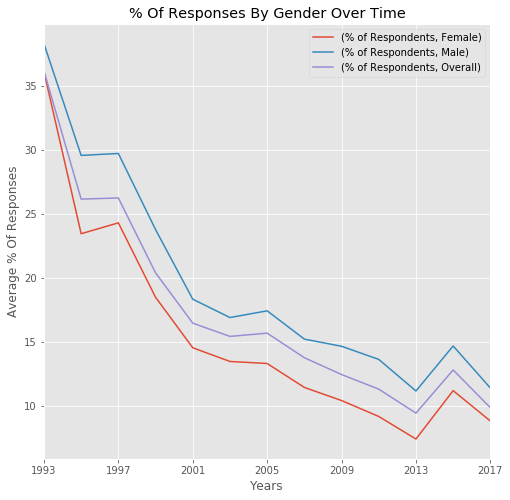

In [17]:

# Use unstack() to Plot all users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
grouped_usa_df.unstack().plot(ax=ax)
plt.title("% Of Responses By Gender Over Time")
plt.xlabel("Years")
plt.ylabel("Average % Of Responses")
leg = ax.legend()







In [18]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
USA_eCig=USA.loc[USA["Use Type"] ==("E-Cigarette Use (Youth)")]
USA_eCig.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
41,NC,2015,North Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,63.0,429,Overall,All Ages,Multiple Race,High School,"{'type': 'Point', 'coordinates': [-79.15925046..."
61,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Middle School,"{'type': 'Point', 'coordinates': [-81.92896053..."
89,NY,2015,New York,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,4.8,2095,Overall,All Ages,White,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
107,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,7.4,362,Overall,All Ages,African American,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."
133,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.8,365,Overall,All Ages,African American,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."


In [19]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
USA_eCig_Avg = USA_eCig.groupby(['Year','Gender']).mean()

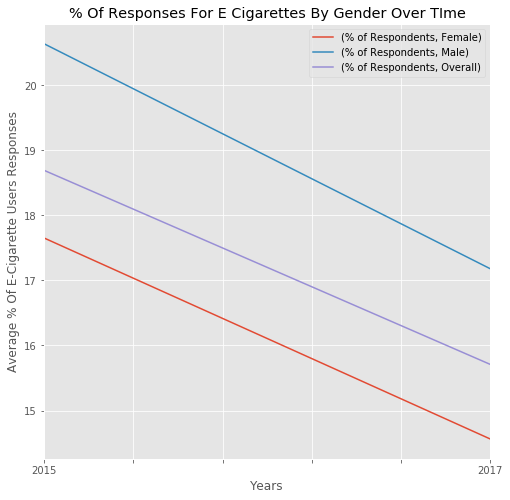

In [20]:
# Use unstack() to Plot the E-Cigarette users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
USA_eCig_Avg.unstack().plot(ax=ax)
plt.title("% Of Responses For E Cigarettes By Gender Over TIme")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()




In [21]:
grouped_usa_Ethinicity = USA.groupby(['Year','Race']).mean()

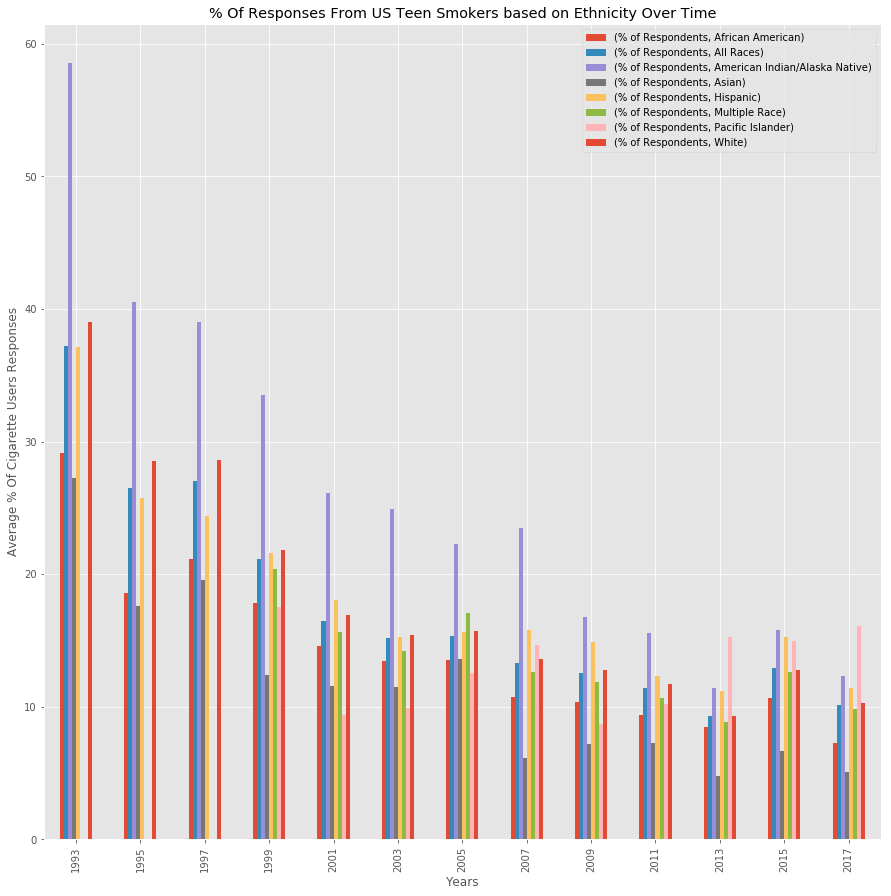

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
grouped_usa_Ethinicity.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US Teen Smokers based on Ethnicity Over Time")
plt.xlabel("Years")
plt.ylabel("Average % Of Cigarette Users Responses")
leg = ax.legend()

In [23]:
USA_eCig_Etinicity = USA_eCig.groupby(['Year','Race']).mean()

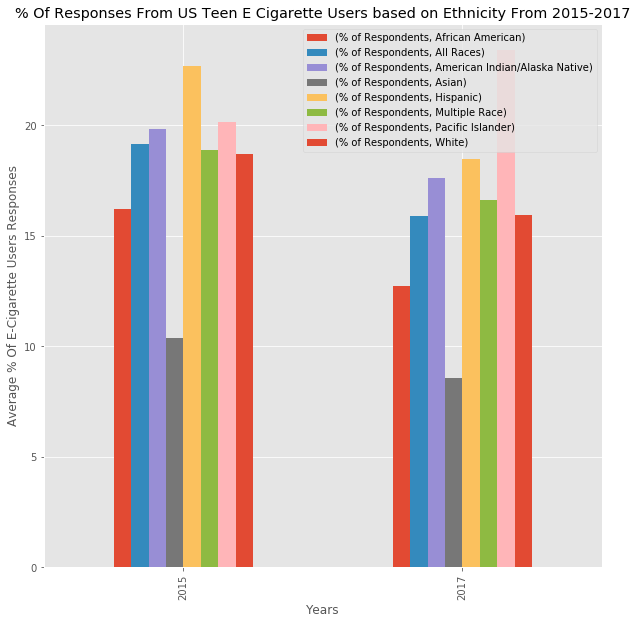

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
USA_eCig_Etinicity.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US Teen E Cigarette Users based on Ethnicity From 2015-2017")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()

In [25]:
#grouped_usa_Frequency = USA.groupby(['Year']).size()
#grouped_usa_Frequency


In [26]:
#grouped_usa_Frequency.value_counts().plot(kind='pie',figsize=(15,15))

In [27]:
Avg_USA=USA[['% of Respondents']]=USA[['% of Respondents']].astype(float)

In [28]:
National= renamed_df.loc[renamed_df["State"] =="National (States and DC)"]
National

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
20991,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.8,7389,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21054,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.4,638,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21076,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,3.5,2737,Overall,All Ages,African American,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21120,US,2017,National (States and DC),Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.1,3536,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21166,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,0.3,633,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21290,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,1.1,2707,Overall,All Ages,African American,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21321,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,28.9,11912,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21476,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1,3547,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21563,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,1.9,807,Overall,All Ages,Multiple Race,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21613,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,29.7,3188,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [29]:
no_null_National =National.dropna(how='any')
no_null_National

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
20991,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.8,7389,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21054,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.4,638,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21076,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,3.5,2737,Overall,All Ages,African American,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21120,US,2017,National (States and DC),Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.1,3536,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21166,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,0.3,633,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21290,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,1.1,2707,Overall,All Ages,African American,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21321,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,28.9,11912,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21476,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1,3547,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21563,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,1.9,807,Overall,All Ages,Multiple Race,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21613,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,29.7,3188,Overall,All Ages,Hispanic,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [30]:
Ohio_df= renamed_df.loc[renamed_df["State"] =="Ohio"]
Ohio_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
8,OH,2013,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Asian,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
23,OH,2011,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Multiple Race,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
49,OH,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,9.8,2498,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
99,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,40.7,358,Overall,All Ages,African American,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
142,OH,2013,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.2,329,Overall,All Ages,African American,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [31]:
no_null_OH =Ohio_df.dropna(how='any')
no_null_OH.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
49,OH,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,9.8,2498,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
99,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,40.7,358,Overall,All Ages,African American,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
142,OH,2013,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.2,329,Overall,All Ages,African American,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
224,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,50.3,667,Female,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
460,OH,2011,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0,375,Overall,All Ages,African American,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [32]:
no_null_National.dtypes

Location Code       object
Year                object
State               object
Use Type            object
Status              object
Frequency           object
% of Respondents    object
Sample Size         object
Gender              object
Age                 object
Race                object
Education           object
geolocation         object
dtype: object

In [33]:
#no_null_State.t0 float
no_null_National[['% of Respondents']]=no_null_National[['% of Respondents']].astype(float)

In [34]:
no_null_OH[['% of Respondents']]=no_null_OH[['% of Respondents']].astype(float)

In [35]:
no_null_OH.dtypes

Location Code        object
Year                 object
State                object
Use Type             object
Status               object
Frequency            object
% of Respondents    float64
Sample Size          object
Gender               object
Age                  object
Race                 object
Education            object
geolocation          object
dtype: object

In [36]:
#state_counts = converted_df["Race"].value_counts()
#state_counts.head()
# Finding the average weight of all students
#no_null_State["% of Respondents"].mean()

In [37]:
no_null_National.dtypes

Location Code        object
Year                 object
State                object
Use Type             object
Status               object
Frequency            object
% of Respondents    float64
Sample Size          object
Gender               object
Age                  object
Race                 object
Education            object
geolocation          object
dtype: object

In [38]:
# USA[['% of Respondents']]=USA[['% of Respondents']].astype(float)

In [39]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_OH_df = no_null_OH.groupby(['Location Code','Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])


# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_OH_df)

In [40]:
grouped_OH_comparison = grouped_OH_df.mean()
grouped_OH_comparison

% of Respondents
Location Code Year Use Type                      Status         Frequency                       Gender  Age      Race             Education                    
OH            1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School              29.0
                                                                                                Male    All Ages All Races        High School              30.4
                                                                                                Overall All Ages African American High School              14.2
                                                                                                                 All Races        High School              29.7
                                                                                                                 White            High School              32.8
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School              66.0
                                                                                                Male    All Ages All Races        High School              71.0
                                                                                                Overall All Ages African American High School              65.1
                                                                                                                 All Races        High School              68.6
                                                                                                                 White            High School              68.8
                                                                Frequent Cigarette Smoker       Female  All Ages All Races        High School              12.3
                                                                                                Male    All Ages All Races        High School              16.1
                                                                                                Overall All Ages African American High School               3.3
                                                                                                                 All Races        High School              14.3
                                                                                                                 White            High School              16.6
              1997 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School              32.0
                                                                                                Male    All Ages All Races        High School              36.9
                                                                                                Overall All Ages African American High School              19.6
                                                                                                                 All Races        High School              34.5
                                                                                                                 White            High School              38.1
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School              67.8
                                                                                                Male    All Ages All Races        High School              70.5
                                                                                                Overall All Ages African American High School              67.3
                                                                                                                 All Races        High School  

In [41]:
grouped_usa_comparison = grouped_usa_df.mean()
grouped_usa_comparison

% of Respondents    17.496282
dtype: float64

In [42]:
#combined_df = combined_df.rename(columns={"% of Respondents_x":"% of USA","% of Respondents_y":"% of Ohio"})
#combined_df

In [43]:
#combined_df = pd.merge(grouped_usa_comparison, grouped_OH_comparison,left_on=['Location Code','Year','Gender'],right_on=['Location Code','Year','Gender'],how="outer")
#combined_df.fillna(0)

In [44]:
#combined_df = combined_df.rename(columns={"% of Respondents_x":"% of USA","% of Respondents_y":"% of Ohio"})
#combined_df.fillna(0)

In [45]:
latlon = (pd.concat({i: json_normalize(x) for i, x in USA.pop('geolocation').items()})
         .reset_index(level=1, drop=True)
         .join(USA)
         .reset_index(drop=True))
latlon.head()

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education
0,"[-98.200781227, 38.3477403]",Point,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,High School
1,"[-108.109830353, 43.235541343]",Point,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,High School
2,"[-75.577741168, 39.008830667]",Point,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Middle School
3,"[-108.109830353, 43.235541343]",Point,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,High School
4,"[-108.109830353, 43.235541343]",Point,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,High School


In [46]:
data2017= latlon.loc[latlon["Year"] =="2017"]
data2017

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education
12802,"[-114.363730042, 43.682630005]",Point,ID,2017,Idaho,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,41.6,849,Male,All Ages,All Races,High School
12803,"[-92.445680071, 31.312660644]",Point,LA,2017,Louisiana,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,40.0,1106,Overall,All Ages,All Races,High School
12804,"[-68.985031336, 45.254228894001]",Point,ME,2017,Maine,Any Tobacco Use (Youth),User Status,Current Tobacco User,21.6,6816,Overall,All Ages,White,High School
12806,"[-85.774490914, 35.68094058]",Point,TN,2017,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.5,1804,Overall,All Ages,All Races,High School
12807,"[-106.240580985, 34.520880952]",Point,NM,2017,New Mexico,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,13.1,6620,Overall,All Ages,All Races,Middle School
12808,"[-77.860700294, 40.793730152]",Point,PA,2017,Pennsylvania,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,41.8,3654,Overall,All Ages,All Races,High School
12809,"[-89.816370742, 44.393191174]",Point,WI,2017,Wisconsin,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.5,2024,Overall,All Ages,All Races,High School
12810,"[-117.071840564, 39.49324039]",Point,NV,2017,Nevada,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,683,Overall,All Ages,Hispanic,High School
12811,"[-84.774971048, 37.645970271]",Point,KY,2017,Kentucky,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,41.5,1475,Overall,All Ages,White,High School
12812,"[-78.457890463, 37.542680674]",Point,VA,2017,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.9,2428,Overall,All Ages,All Races,Middle School


In [47]:
latlon2 = pd.DataFrame(latlon["coordinates"].values.tolist())
latlon2.head()

,0,1
0,-98.200781,38.347740
1,-108.109830,43.235541
2,-75.577741,39.008831
3,-108.109830,43.235541
4,-108.109830,43.235541


In [48]:
renamedlatlon = latlon2.rename(columns={0:"Lon",1:"Lat"})
renamedlatlon.head()

,Lon,Lat
0,-98.200781,38.347740
1,-108.109830,43.235541
2,-75.577741,39.008831
3,-108.109830,43.235541
4,-108.109830,43.235541


In [49]:
mergedlatlon = pd.merge(latlon, renamedlatlon, left_index=True, right_index=True, how='inner')
mergedlatlon

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lon,Lat
0,"[-98.200781227, 38.3477403]",Point,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,High School,-98.200781,38.347740
1,"[-108.109830353, 43.235541343]",Point,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,High School,-108.109830,43.235541
2,"[-75.577741168, 39.008830667]",Point,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Middle School,-75.577741,39.008831
3,"[-108.109830353, 43.235541343]",Point,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,High School,-108.109830,43.235541
4,"[-108.109830353, 43.235541343]",Point,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,High School,-108.109830,43.235541
5,"[-89.538030825, 32.745510099]",Point,MS,2001,Mississippi,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,14.3,808,Overall,All Ages,African American,Middle School,-89.538031,32.745510
6,"[-72.517640791, 43.625381239]",Point,VT,2005,Vermont,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,20.8,127,Overall,All Ages,African American,High School,-72.517641,43.625381
7,"[-109.424420645, 47.066528972]",Point,MT,2005,Montana,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,70.3,109,Overall,All Ages,Hispanic,High School,-109.424421,47.066529
8,"[-114.363730042, 43.682630005]",Point,ID,2013,Idaho,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,8.2,1360,Overall,All Ages,White,High School,-114.363730,43.682630
9,"[-106.240580985, 34.520880952]",Point,NM,2005,New Mexico,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,3.3,2647,Male,All Ages,All Races,High School,-106.240581,34.520881


In [50]:
ECig_df= mergedlatlon.loc[mergedlatlon["Use Type"] =="E-Cigarette Use (Youth)"]
ECig_Gender = ECig_df.loc[ECig_df["Gender"] =="Overall"]
ECig_Race = ECig_Gender.loc[ECig_Gender["Race"] =="All Races"]
ECig_User = ECig_Race.loc[ECig_Race["Frequency"] =="Current E-Cigarette User"]
ECig_2017 = ECig_User.loc[ECig_User["Year"] =="2017"]
ECig_2017

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lon,Lat
12806,"[-85.774490914, 35.68094058]",Point,TN,2017,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.5,1804,Overall,All Ages,All Races,High School,-85.774491,35.680941
12812,"[-78.457890463, 37.542680674]",Point,VA,2017,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.9,2428,Overall,All Ages,All Races,Middle School,-78.457890,37.542681
12883,"[-80.712640135, 38.665510202]",Point,WV,2017,West Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,14.3,1385,Overall,All Ages,All Races,High School,-80.712640,38.665510
13000,"[-99.365720623, 41.641040988001]",Point,NE,2017,Nebraska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.4,1268,Overall,All Ages,All Races,High School,-99.365721,41.641041
13030,"[-76.609260111, 39.290580964]",Point,MD,2017,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,13.3,45743,Overall,All Ages,All Races,High School,-76.609260,39.290581
13048,"[-75.577741168, 39.008830667]",Point,DE,2017,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.7,2814,Overall,All Ages,All Races,Middle School,-75.577741,39.008831
13083,"[-106.240580985, 34.520880952]",Point,NM,2017,New Mexico,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,10.9,6713,Overall,All Ages,All Races,Middle School,-106.240581,34.520881
13182,"[-120.999999538, 37.638640123]",Point,CA,2017,California,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,1673,Overall,All Ages,All Races,High School,-121.000000,37.638640
13222,"[-89.816370742, 44.393191174]",Point,WI,2017,Wisconsin,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.6,1869,Overall,All Ages,All Races,High School,-89.816371,44.393191
13256,"[-147.722059036, 64.845079957001]",Point,AK,2017,Alaska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,15.7,1233,Overall,All Ages,All Races,High School,-147.722059,64.845080


In [51]:
ECig_df= mergedlatlon.loc[mergedlatlon["Use Type"] =="E-Cigarette Use (Youth)"]
ECig_Gender = ECig_df.loc[ECig_df["Gender"] =="Overall"]
ECig_Race = ECig_Gender.loc[ECig_Gender["Race"] =="All Races"]
ECig_User = ECig_Race.loc[ECig_Race["Frequency"] =="Current E-Cigarette User"]
ECig_2015 = ECig_User.loc[ECig_User["Year"] =="2015"]
ECig_2015

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lon,Lat
41,"[-81.928960539, 28.932040377]",Point,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Middle School,-81.928961,28.932040
908,"[-75.577741168, 39.008830667]",Point,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.5,2662,Overall,All Ages,All Races,High School,-75.577741,39.008831
1271,"[-100.373530637, 44.353130053]",Point,SD,2015,South Dakota,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,1282,Overall,All Ages,All Races,High School,-100.373531,44.353130
1406,"[-77.860700294, 40.793730152]",Point,PA,2015,Pennsylvania,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.1,2831,Overall,All Ages,All Races,High School,-77.860700,40.793730
1838,"[-75.577741168, 39.008830667]",Point,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,8.4,2961,Overall,All Ages,All Races,Middle School,-75.577741,39.008831
1976,"[-157.857749403, 21.304850435]",Point,HI,2015,Hawaii,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,15.7,6146,Overall,All Ages,All Races,Middle School,-157.857749,21.304850
3107,"[-86.631860762, 32.840571122]",Point,AL,2015,Alabama,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.5,1528,Overall,All Ages,All Races,High School,-86.631861,32.840571
3661,"[-92.566300053, 38.635790776]",Point,MO,2015,Missouri,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,22.0,1460,Overall,All Ages,All Races,High School,-92.566300,38.635791
4445,"[-109.424420645, 47.066528972]",Point,MT,2015,Montana,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,29.5,4416,Overall,All Ages,All Races,High School,-109.424421,47.066529
4955,"[-76.609260111, 39.290580964]",Point,MD,2015,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,7.6,25863,Overall,All Ages,All Races,Middle School,-76.609260,39.290581


In [52]:
# Store 'Lat' and 'Lng' into  locations 
locations2015 = ECig_2015[["Lat", "Lon"]].astype(float)

# Convert User Rate to float and store
Users2015 = ECig_2015["% of Respondents"].astype(float)

In [53]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2015, weights=Users2015, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
# Store 'Lat' and 'Lng' into  locations 
locations2017 = ECig_2017[["Lat", "Lon"]].astype(float)

# Convert User Rate to float and store
Users2017 = ECig_2017["% of Respondents"].astype(float)

In [55]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2017, weights=Users2017, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
USA_Use = USA.loc[USA["Use Type"] =="Cigarette Use (Youth)"]
USA_Gender = USA_Use.loc[USA_Use["Gender"] =="Overall"]
USA_Race = USA_Gender.loc[USA_Gender["Race"] =="All Races"]
USA_User = USA_Race.loc[USA_Race["Frequency"] =="Current Cigarette Smoker"]
USA_1993 = USA_User.loc[USA_Race["Year"] =="1993"]
USA_1993

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education
26,MT,1993,Montana,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,30.7,2424,Overall,All Ages,All Races,High School
435,TN,1993,Tennessee,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,35.3,3142,Overall,All Ages,All Races,High School
853,MS,1993,Mississippi,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,27.6,1348,Overall,All Ages,All Races,High School
1342,IL,1993,Illinois,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,29.1,3859,Overall,All Ages,All Races,High School
2639,WV,1993,West Virginia,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,38.9,2740,Overall,All Ages,All Races,High School
5356,SD,1993,South Dakota,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,36.7,1311,Overall,All Ages,All Races,High School
5405,NV,1993,Nevada,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,29.9,1968,Overall,All Ages,All Races,High School
6266,NC,1993,North Carolina,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,29.3,2378,Overall,All Ages,All Races,High School
10917,ID,1993,Idaho,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,27.3,3918,Overall,All Ages,All Races,High School
14998,NE,1993,Nebraska,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,33.7,3124,Overall,All Ages,All Races,High School


In [57]:
Nat_Use = no_null_National.loc[no_null_National["Use Type"] =="Cigarette Use (Youth)"]
Nat_Gender = Nat_Use.loc[Nat_Use["Gender"] =="Overall"]
Nat_Race = Nat_Gender.loc[Nat_Gender["Race"] =="All Races"]
Nat_User = Nat_Race.loc[Nat_Race["Frequency"] =="Current Cigarette Smoker"]
Nat_User

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,geolocation
24119,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.8,14407,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34293,US,2003,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,21.9,14335,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34326,US,2005,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,23.0,13284,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34329,US,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,15.7,13022,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34340,US,2001,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,28.5,12960,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34408,US,1993,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,30.5,15698,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34428,US,1997,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,36.4,15124,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34442,US,1999,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.8,14812,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34444,US,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,18.1,14743,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34449,US,2015,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,10.8,14989,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [58]:
USA_1993 = USA_1993.rename(columns={"% of Respondents":"Users"})
USA_1993

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,Education
26,MT,1993,Montana,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,30.7,2424,Overall,All Ages,All Races,High School
435,TN,1993,Tennessee,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,35.3,3142,Overall,All Ages,All Races,High School
853,MS,1993,Mississippi,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,27.6,1348,Overall,All Ages,All Races,High School
1342,IL,1993,Illinois,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,29.1,3859,Overall,All Ages,All Races,High School
2639,WV,1993,West Virginia,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,38.9,2740,Overall,All Ages,All Races,High School
5356,SD,1993,South Dakota,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,36.7,1311,Overall,All Ages,All Races,High School
5405,NV,1993,Nevada,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,29.9,1968,Overall,All Ages,All Races,High School
6266,NC,1993,North Carolina,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,29.3,2378,Overall,All Ages,All Races,High School
10917,ID,1993,Idaho,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,27.3,3918,Overall,All Ages,All Races,High School
14998,NE,1993,Nebraska,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,33.7,3124,Overall,All Ages,All Races,High School


In [59]:
# Add a column whose default values are the expected values
USA_1993[13] = 1
USA_1993 = USA_1993.rename(columns={13:"Setting"})
USA_1993

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,Education,Setting
26,MT,1993,Montana,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,30.7,2424,Overall,All Ages,All Races,High School,1
435,TN,1993,Tennessee,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,35.3,3142,Overall,All Ages,All Races,High School,1
853,MS,1993,Mississippi,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,27.6,1348,Overall,All Ages,All Races,High School,1
1342,IL,1993,Illinois,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,29.1,3859,Overall,All Ages,All Races,High School,1
2639,WV,1993,West Virginia,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,38.9,2740,Overall,All Ages,All Races,High School,1
5356,SD,1993,South Dakota,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,36.7,1311,Overall,All Ages,All Races,High School,1
5405,NV,1993,Nevada,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,29.9,1968,Overall,All Ages,All Races,High School,1
6266,NC,1993,North Carolina,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,29.3,2378,Overall,All Ages,All Races,High School,1
10917,ID,1993,Idaho,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,27.3,3918,Overall,All Ages,All Races,High School,1
14998,NE,1993,Nebraska,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,33.7,3124,Overall,All Ages,All Races,High School,1


In [60]:
Nat_User = Nat_User.rename(columns={"% of Respondents":"Users"})
Nat_User

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,Education,geolocation
24119,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.8,14407,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34293,US,2003,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,21.9,14335,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34326,US,2005,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,23.0,13284,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34329,US,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,15.7,13022,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34340,US,2001,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,28.5,12960,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34408,US,1993,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,30.5,15698,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34428,US,1997,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,36.4,15124,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34442,US,1999,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.8,14812,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34444,US,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,18.1,14743,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
34449,US,2015,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,10.8,14989,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [61]:
Nat_User[14] = 2
Nat_User = Nat_User.rename(columns={14:"Setting"})
Nat_User

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,Education,geolocation,Setting
24119,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.8,14407,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ...",2
34293,US,2003,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,21.9,14335,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ...",2
34326,US,2005,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,23.0,13284,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ...",2
34329,US,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,15.7,13022,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ...",2
34340,US,2001,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,28.5,12960,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ...",2
34408,US,1993,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,30.5,15698,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ...",2
34428,US,1997,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,36.4,15124,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ...",2
34442,US,1999,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.8,14812,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ...",2
34444,US,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,18.1,14743,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ...",2
34449,US,2015,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,10.8,14989,Overall,All Ages,All Races,High School,"{'type': 'Point', 'coordinates': [-95.712891, ...",2


In [62]:
# Calculate the population mean
population1 = USA_1993[USA_1993["Setting"] == 1]
population1.Users.mean()

30.310526315789474

In [63]:
# Calculate the population mean for Sardine Vertebrae in San Diego
population2 =Nat_User[Nat_User["Setting"] == 2]
population2.Users.mean()

23.292307692307695

In [64]:
# Calculate Independent (Two Sample) T-Test
# USA 1993 vs. National AVG 1993 - 2017
stats.ttest_ind(population1.Users, population2.Users, equal_var=False)

Ttest_indResult(statistic=2.5406554276816777, pvalue=0.021255831629967477)

In [65]:
USA_2017 = USA_User.loc[USA_User["Year"] =="2017"]
USA_2017

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education
21044,NM,2017,New Mexico,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,10.6,5553,Overall,All Ages,All Races,High School
21097,KY,2017,Kentucky,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,14.3,1898,Overall,All Ages,All Races,High School
21125,CT,2017,Connecticut,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.9,2404,Overall,All Ages,All Races,High School
21128,NH,2017,New Hampshire,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.8,11910,Overall,All Ages,All Races,High School
21463,MD,2017,Maryland,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.2,50735,Overall,All Ages,All Races,High School
21513,AZ,2017,Arizona,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.1,2030,Overall,All Ages,All Races,High School
21554,CO,2017,Colorado,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.0,1489,Overall,All Ages,All Races,High School
21577,HI,2017,Hawaii,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.1,5895,Overall,All Ages,All Races,High School
21674,SC,2017,South Carolina,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,10.0,1385,Overall,All Ages,All Races,High School
22065,NC,2017,North Carolina,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,12.1,3130,Overall,All Ages,All Races,High School


In [66]:
USA_2017 = USA_2017.rename(columns={"% of Respondents":"Users"})
USA_2017

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,Education
21044,NM,2017,New Mexico,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,10.6,5553,Overall,All Ages,All Races,High School
21097,KY,2017,Kentucky,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,14.3,1898,Overall,All Ages,All Races,High School
21125,CT,2017,Connecticut,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.9,2404,Overall,All Ages,All Races,High School
21128,NH,2017,New Hampshire,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.8,11910,Overall,All Ages,All Races,High School
21463,MD,2017,Maryland,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.2,50735,Overall,All Ages,All Races,High School
21513,AZ,2017,Arizona,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.1,2030,Overall,All Ages,All Races,High School
21554,CO,2017,Colorado,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.0,1489,Overall,All Ages,All Races,High School
21577,HI,2017,Hawaii,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.1,5895,Overall,All Ages,All Races,High School
21674,SC,2017,South Carolina,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,10.0,1385,Overall,All Ages,All Races,High School
22065,NC,2017,North Carolina,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,12.1,3130,Overall,All Ages,All Races,High School


In [68]:
USA_2017[13] = 3
USA_2017 = USA_2017.rename(columns={13:"Setting"})
USA_2017

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,Education,Setting
21044,NM,2017,New Mexico,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,10.6,5553,Overall,All Ages,All Races,High School,3
21097,KY,2017,Kentucky,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,14.3,1898,Overall,All Ages,All Races,High School,3
21125,CT,2017,Connecticut,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.9,2404,Overall,All Ages,All Races,High School,3
21128,NH,2017,New Hampshire,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.8,11910,Overall,All Ages,All Races,High School,3
21463,MD,2017,Maryland,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.2,50735,Overall,All Ages,All Races,High School,3
21513,AZ,2017,Arizona,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.1,2030,Overall,All Ages,All Races,High School,3
21554,CO,2017,Colorado,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.0,1489,Overall,All Ages,All Races,High School,3
21577,HI,2017,Hawaii,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.1,5895,Overall,All Ages,All Races,High School,3
21674,SC,2017,South Carolina,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,10.0,1385,Overall,All Ages,All Races,High School,3
22065,NC,2017,North Carolina,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,12.1,3130,Overall,All Ages,All Races,High School,3


In [69]:
# Calculate the population mean
population3 = USA_2017[USA_2017["Setting"] == 3]
population3.Users.mean()

7.212962962962963

In [70]:
# Calculate Independent (Two Sample) T-Test
# USA 2017 vs. National AVG 1993 - 2017
stats.ttest_ind(population3.Users, population2.Users, equal_var=False)

Ttest_indResult(statistic=-6.256192690307963, pvalue=3.0450421075632693e-05)

In [71]:
# Calculate Independent (Two Sample) T-Test
#USA 1993 vs. USA 2017
stats.ttest_ind(population1.Users, population3.Users, equal_var=False)

Ttest_indResult(statistic=18.878113070078, pvalue=2.465517886225572e-16)

In [72]:
ECig_2015 = ECig_2015.rename(columns={"% of Respondents":"Users"})
ECig_2017 = ECig_2017.rename(columns={"% of Respondents":"Users"})
ECig_2017.head()

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,Education,Lon,Lat
12806,"[-85.774490914, 35.68094058]",Point,TN,2017,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.5,1804,Overall,All Ages,All Races,High School,-85.774491,35.680941
12812,"[-78.457890463, 37.542680674]",Point,VA,2017,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.9,2428,Overall,All Ages,All Races,Middle School,-78.457890,37.542681
12883,"[-80.712640135, 38.665510202]",Point,WV,2017,West Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,14.3,1385,Overall,All Ages,All Races,High School,-80.712640,38.665510
13000,"[-99.365720623, 41.641040988001]",Point,NE,2017,Nebraska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.4,1268,Overall,All Ages,All Races,High School,-99.365721,41.641041
13030,"[-76.609260111, 39.290580964]",Point,MD,2017,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,13.3,45743,Overall,All Ages,All Races,High School,-76.609260,39.290581


In [73]:
# Add a column
ECig_2015[16] = 1
ECig_2015 = ECig_2015.rename(columns={16:"Setting"})
ECig_2015.head()

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,Education,Lon,Lat,Setting
41,"[-81.928960539, 28.932040377]",Point,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Middle School,-81.928961,28.932040,1
908,"[-75.577741168, 39.008830667]",Point,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.5,2662,Overall,All Ages,All Races,High School,-75.577741,39.008831,1
1271,"[-100.373530637, 44.353130053]",Point,SD,2015,South Dakota,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,1282,Overall,All Ages,All Races,High School,-100.373531,44.353130,1
1406,"[-77.860700294, 40.793730152]",Point,PA,2015,Pennsylvania,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.1,2831,Overall,All Ages,All Races,High School,-77.860700,40.793730,1
1838,"[-75.577741168, 39.008830667]",Point,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,8.4,2961,Overall,All Ages,All Races,Middle School,-75.577741,39.008831,1


In [74]:
# Add a column
ECig_2017[16] = 1
ECig_2017 = ECig_2017.rename(columns={16:"Setting"})
ECig_2017.head()

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,Education,Lon,Lat,Setting
12806,"[-85.774490914, 35.68094058]",Point,TN,2017,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.5,1804,Overall,All Ages,All Races,High School,-85.774491,35.680941,1
12812,"[-78.457890463, 37.542680674]",Point,VA,2017,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.9,2428,Overall,All Ages,All Races,Middle School,-78.457890,37.542681,1
12883,"[-80.712640135, 38.665510202]",Point,WV,2017,West Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,14.3,1385,Overall,All Ages,All Races,High School,-80.712640,38.665510,1
13000,"[-99.365720623, 41.641040988001]",Point,NE,2017,Nebraska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.4,1268,Overall,All Ages,All Races,High School,-99.365721,41.641041,1
13030,"[-76.609260111, 39.290580964]",Point,MD,2017,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,13.3,45743,Overall,All Ages,All Races,High School,-76.609260,39.290581,1


In [75]:
# Calculate the population mean
population4 = ECig_2017[ECig_2017["Setting"] == 1]
population4.Users.mean()

12.938461538461542

In [76]:
# Calculate the population mean
population5 = ECig_2015[ECig_2015["Setting"] == 1]
population5.Users.mean()

19.659574468085108

In [77]:
# Calculate Independent (Two Sample) T-Test
# E-Cig 2015 vs E-Cig 2017
stats.ttest_ind(population4.Users, population5.Users, equal_var=False)

Ttest_indResult(statistic=-5.054574935474676, pvalue=2.2746838450716062e-06)

In [ ]:
# Observed data
observed = pd.Series([USA_1993.loc[USA_1993["% of Respondents"]]], index=USA_1993.loc[USA_1993["Location Code"]])

In [ ]:
# Create a data frame
df = pd.DataFrame([observed]).T

In [ ]:
# Add a column whose default values are the expected values
df[1] = 30.5

In [ ]:
# Rename columns
df.columns = ["observed", "expected"]
df

In [ ]:
# The degree of freedom is 19-1 = 18
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)

In [ ]:
# The critical value
critical_value

In [ ]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])